# Module 6 - Correlation & Linear Regression

In [19]:
import pandas as pd
import numpy as np

## Correlation

In [20]:
Location = "nyc-rolling-sales.csv"
df = pd.read_csv(Location)

df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [21]:
df.corr()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
Unnamed: 0,1.000000,0.088817,0.264130,-0.031601,0.166882,-0.013318,-0.002821,-0.012856,-0.004057,0.017395
BOROUGH,0.088817,1.000000,0.417001,-0.277848,0.256564,-0.023229,-0.005503,-0.023346,0.108303,-0.315163
BLOCK,0.264130,0.417001,1.000000,-0.229118,0.234063,-0.015628,-0.003517,-0.015888,0.071262,-0.287300
LOT,-0.031601,-0.277848,-0.229118,1.000000,-0.145802,-0.034303,-0.010953,-0.033169,-0.289463,0.296680
ZIP CODE,0.166882,0.256564,0.234063,-0.145802,1.000000,0.005578,0.000726,0.005415,0.330708,-0.142915
RESIDENTIAL UNITS,-0.013318,-0.023229,-0.015628,-0.034303,0.005578,1.000000,0.015653,0.888309,0.025380,-0.001074
COMMERCIAL UNITS,-0.002821,-0.005503,-0.003517,-0.010953,0.000726,0.015653,1.000000,0.472998,0.006428,0.049586
TOTAL UNITS,-0.012856,-0.023346,-0.015888,-0.033169,0.005415,0.888309,0.472998,1.000000,0.024568,0.026429
YEAR BUILT,-0.004057,0.108303,0.071262,-0.289463,0.330708,0.025380,0.006428,0.024568,1.000000,-0.187609
TAX CLASS AT TIME OF SALE,0.017395,-0.315163,-0.287300,0.296680,-0.142915,-0.001074,0.049586,0.026429,-0.187609,1.000000


## Linear Regression

In [22]:
import statsmodels.formula.api as smf

In [23]:
df["ZIP_CODE"]=df["ZIP CODE"]
df["YEAR_BUILT"]=df["YEAR BUILT"]
df["RESIDENTIAL_UNITS"]=df["RESIDENTIAL UNITS"]
df["COMMERCIAL_UNITS"]=df["COMMERCIAL UNITS"]

In [24]:
result = smf.ols('ZIP_CODE ~ YEAR_BUILT + RESIDENTIAL_UNITS + COMMERCIAL_UNITS', data=df).fit()

In [25]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ZIP_CODE   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     3461.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:53:30   Log-Likelihood:            -7.2070e+05
No. Observations:               84548   AIC:                         1.441e+06
Df Residuals:                   84544   BIC:                         1.441e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          9310.5644     14.568    639.110      0.000    9282.011    9339.118
YEAR_BUILT            0.7947      0.008    101.882      0.000       0.779       0.810
RESIDENTIAL_UNITS    -0.2159      0.251     -0.861      0.389      -0.707       0.275
COMMERCIAL_UNITS     -0.2010      0.481     -0.418      0.676      -1.144       0.742
==============================================================================
Omnibus:                    87355.265   Durbin-Watson:                   0.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5693453.141
Skew:                          -5.226   Prob(JB):                         0.00
Kurtosis:                      41.819   Cond. No.                     6.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There is a 79% (coeff. 0.7947) positive correlation between the zip code and the year built.  However a negative correlation between zip code and residential units and commercial units. The p-value for Year-built is 0, less than 0.05 so there is no association between zip code and year built and the null hypothesis must be rejected.  However there is a high p-value for residential units (0.389) and even higher for commercial units (0.676), which both have a positive effect on zip code.  The R-Squared is 0.109  which means that about 11% of the variation in the zip code is explained by year built.

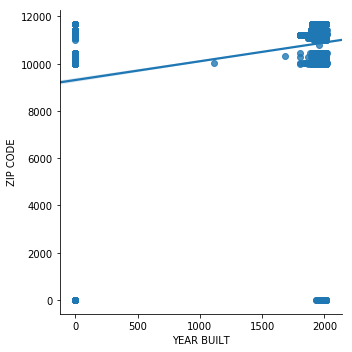

In [26]:
sns.lmplot(x="YEAR BUILT", y="ZIP CODE", data=df)

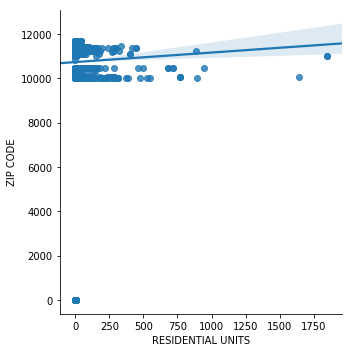

In [27]:
sns.lmplot(x="RESIDENTIAL UNITS", y="ZIP CODE", data=df)

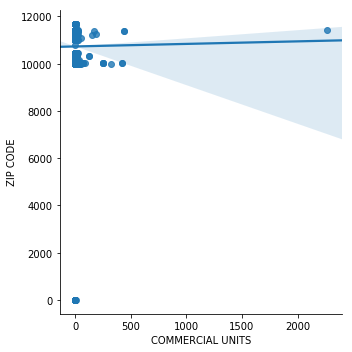

In [28]:
sns.lmplot(x="COMMERCIAL UNITS", y="ZIP CODE", data=df)

### Your Turn

Run a correlation and regresssion on the dataset below. What can you tell from the data?

In [6]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns



In [7]:
Location2 = "tamiami.csv"

df = pd.read_csv(Location2)
df.head()

,Cart Location,Hot Dog Sales,Employees in Nearby Office Buildings,Num of Nearby Restaurants,Num of Other Food Carts Nearby,Price
0,1,100,1600,8,12,4.16
1,2,80,1200,6,13,4.63
2,3,450,2800,19,6,0.50
3,4,580,4300,19,2,0.47
4,5,100,1400,6,13,4.24


In [8]:
columns = ['location', 'sales', 'employees', 'restaurants', 'foodcarts', 'price']

#change column names for readability
df.columns = columns
df.head()

,location,sales,employees,restaurants,foodcarts,price
0,1,100,1600,8,12,4.16
1,2,80,1200,6,13,4.63
2,3,450,2800,19,6,0.50
3,4,580,4300,19,2,0.47
4,5,100,1400,6,13,4.24


In [9]:
df.corr()

,location,sales,employees,restaurants,foodcarts,price
location,1.000000,0.042705,-0.068923,0.049701,0.077219,-0.138444
sales,0.042705,1.000000,0.943238,0.913674,-0.919762,-0.966378
employees,-0.068923,0.943238,1.000000,0.856976,-0.874692,-0.881540
restaurants,0.049701,0.913674,0.856976,1.000000,-0.761793,-0.933951
foodcarts,0.077219,-0.919762,-0.874692,-0.761793,1.000000,0.860154
price,-0.138444,-0.966378,-0.881540,-0.933951,0.860154,1.000000


There is a strong positive correlation between sales and employees, sales and restaurants, and employees and restaurants.  There is a strong negative correlation between sales and footcarts, sales and price and employees and price.

In [10]:
result = smf.ols('employees ~ restaurants + sales + location', data=df).fit()

In [11]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              employees   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     79.52
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           3.18e-13
Time:                        18:12:56   Log-Likelihood:                -210.20
No. Observations:                  30   AIC:                             428.4
Df Residuals:                      26   BIC:                             434.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1001.5366    176.972      5.659      0.000     637.766    1365.308
restaurants    -3.7873     25.798     -0.147      0.884     -56.816      49.242
sales           4.7648      0.744      6.401      0.000       3.235       6.295
location      -10.7471      6.060     -1.773      0.088     -23.204       1.710
==============================================================================
Omnibus:                        0.231   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.366
Skew:                           0.178   Prob(JB):                        0.833
Kurtosis:                       2.592   Cond. No.                     1.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There is a positive correlation between the employees and the sales.  However a negative correlation between employees and restaurants and location. The p-value for sales is 0, less than 0.05 so there is no association between sales and employees and the null hypothesis must be rejected.  However there is a slighly higher than 0.05 p-value for location (0.088) and a very strong one for restaurants (0.884), which are both positively associated to employees.  The R-Squared is also strong at  0.902  which means that about 90% of the variation in the number of employees is explained by the data.

In [12]:
import seaborn as sns

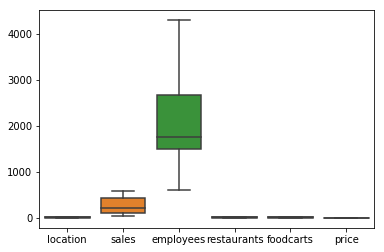

In [13]:
sns.boxplot(data=df)

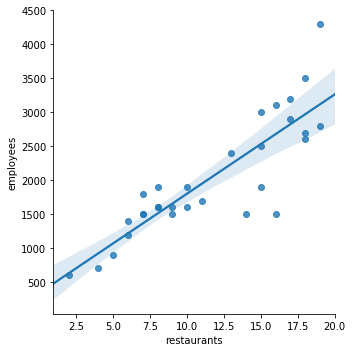

In [16]:
sns.lmplot(x="restaurants", y="employees", data=df)

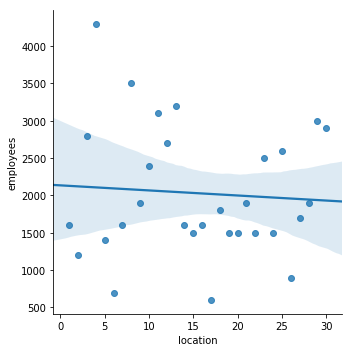

In [17]:
sns.lmplot(x="location", y="employees", data=df)

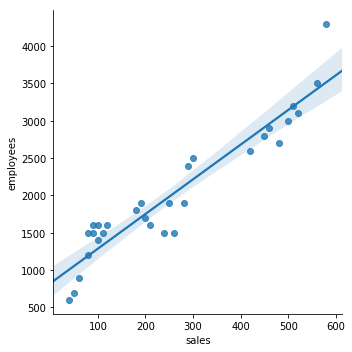

In [18]:
sns.lmplot(x="sales", y="employees", data=df)